In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Primarily loading the data

goog_data = pd.read_csv('playstore-analysis.csv', index_col='App')
goog_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# summary information
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


- From the above data it is observed that there are 10841 entries or rows and 13 columns
- 'Rating' column has highest null or missing values : 10841 - 9367 = 1474 null values

### 1. Data clean up – Missing value treatment
    - a. Drop records where rating is missing since rating is our target/study variable
    - b. Check the null values for the Android Ver column.
        - i. Are all 3 records having the same problem?
        - ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
        - iii. Replace remaining missing values with the mode
    - c. Current ver – replace with most common value

In [4]:
goog_data.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# drop records where rating is missing

goog_data = goog_data.dropna(subset=['Rating'])
goog_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [6]:
goog_data.shape

(9367, 12)

Check the null values for the Android Ver column. Are all 3 records having the same problem.

Yes. All three records have missing values.



In [7]:
# Drop the 3rd record i.e. record for “Life Made WIFI …”

goog_data = goog_data.drop('Life Made WI-Fi Touchscreen Photo Frame')

In [8]:
# removing remaining null values

goog_data = goog_data.dropna(subset=['Current Ver', 'Android Ver'])
goog_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2. Data clean up – correcting the data types
- a. Which all variables need to be brought to numeric types?
- b. Price variable – remove $ sign and convert to float
- c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
- d. Convert all other identified columns to numeric

In [9]:
goog_data.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 'Rating, 'Reviews', 'Size, 'Installs', 'Price' need be brought to numeric types

In [10]:
# Price variable – remove $ sign and convert to float

goog_data['Price'] = goog_data['Price'].str.replace('$','').astype(float)


In [11]:
goog_data['Price'].sample(10)

App
PhotoWonder: Pro Beauty Photo Editor Collage Maker    0.0
Pregnant Emergency Surgery                            0.0
Power Pop Bubbles                                     0.0
THE KING OF FIGHTERS-A 2012(F)                        0.0
Contents Provider(C.P.)Explorer                       0.0
Dresses Ideas & Fashions +3000                        0.0
Ariana News AF                                        0.0
tutti.ch - Free Classifieds                           0.0
Reuters News                                          0.0
Cheapflights – Flight Search                          0.0
Name: Price, dtype: float64

In [12]:
goog_data.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### The price column now doesn't have any '$' sign in any values and data type is float


In [13]:
# Installs – remove ‘,’ and ‘+’ sign, convert to integer]

goog_data['Installs'] = goog_data['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [14]:
# checking 'installs' column data

print(goog_data['Installs'].sample(5))
print('-------------------------------')
print(goog_data.dtypes)

App
Ab Workouts - Ab Generator           1000
4x4 Jeep Racer                    1000000
Ghost Snap AR Horror Survival      100000
Pixlr-o-matic                    10000000
Bathroom Decorating Ideas          500000
Name: Installs, dtype: int32
-------------------------------
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


#### Thus the '+' and ',' have been removed and the data type is now converted to integer

In [15]:
# Convert all other identified columns to numeric
# 'Rating, 'Reviews', 'Size', 'Installs', 'Price' were earlier identified as columns which need to converted to numeric type
# 'Rating,'Size', 'Installs', 'Price' area already converted to numeric type
# Converting remaining column 'Reviews' to numeric type

goog_data['Reviews'] = goog_data['Reviews'].astype(int)
goog_data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### All identified columns have been converted to numeric type

### 3. Sanity checks – check for the following and handle accordingly.
    - a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
        - i. Are there any such records? Drop if so.
    - b. Reviews should not be more than installs as only those who installed can review the app.
        - i. Are there any such records? Drop if so.

In [16]:
# Checking for records where ratings is more than 5 and dropping them

(goog_data['Rating']>5).sum()

0

No records have rating more than 5

In [17]:
# Checking if 'reviews' are more than 'installs' and dropping if there are

(goog_data['Reviews'] > goog_data['Installs']).sum()

7

In [18]:
# Dropping the excess reviews

goog_data.drop(goog_data[goog_data['Reviews'] > goog_data['Installs']].index, axis=0, inplace=True)

In [19]:
(goog_data['Reviews'] > goog_data['Installs']).sum()

0

#### No.of reviews are now same as no.of installs

### 4. Identify and handle outliers 
- a. Price column
    - i. Make suitable plot to identify outliers in price
    - ii. Do you expect apps on the play store to cost 200 dollars, Check out these cases.
    - iii. After dropping the useless records, make the suitable plot again to identify outliers
    - iv. Limit data to records with price < $30
- b. Reviews column
    - i. Make suitable plot
    - ii. Limit data to apps with < 1 Million reviews
- c. Installs
    - i. What is the 95th percentile of the installs?
    - ii. Drop records having a value more than the 95th percentile

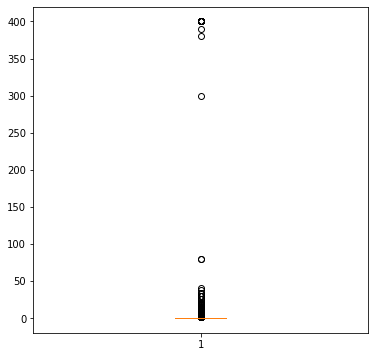

In [20]:
# Plot to identify outliers in 'price'

plt.figure(figsize=(6,6))
plt.boxplot(x = 'Price',data = goog_data);

Outliers are present in 'Price' column

No, there is no app that would cost '$200'

In [21]:
# Limit data to records with price < $30
# Checking data for total records of price more than $30

(goog_data['Price']>30).sum()

21

In [22]:
# Dropping records for 'Price' more than $30

goog_data.drop(goog_data[goog_data['Price'] > 30].index, axis=0, inplace=True)

In [23]:
(goog_data['Price']>30).sum()

0

All records with 'price' greater than $30 have been dropped

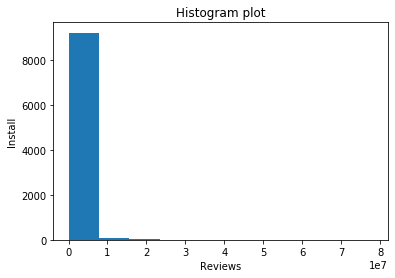

In [24]:
# Make suitable plot for reviews

plt.hist(goog_data['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Install')
plt.title('Histogram plot');

In [25]:
# Limit data to apps with < 1 Million reviews
# checking records for reviews more than 1 million reviews

(goog_data['Reviews']>1000000).sum()

704

In [26]:
# dropping records of reviews more than 1 million

goog_data.drop(goog_data[goog_data['Reviews'] > 1000000].index, axis=0, inplace=True)
(goog_data['Reviews']>1000000).sum()

0

All records of reviews more than 1 million have been dropped

In [27]:
# What is the 95th percentile of the installs?

goog_data.quantile(0.95)

Rating             4.80
Reviews       413392.70
Size           68000.00
Installs    10000000.00
Price              1.99
Name: 0.95, dtype: float64

95th quantile of 'installs' is 10000000.00

In [28]:
# Drop records having a value more than the 95th percentile

goog_data.drop(goog_data[goog_data['Installs'] > goog_data['Installs'].quantile(0.95)].index, axis=0, inplace=True)

In [29]:
(goog_data['Installs']> goog_data['Installs'].quantile(0.95)).sum()

0

All records of 'Installs' more 95th quantile have been dropped

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
- a. How do you explain this?
- b. What is the implication of this on your analysis?

Skewness: -1.744113


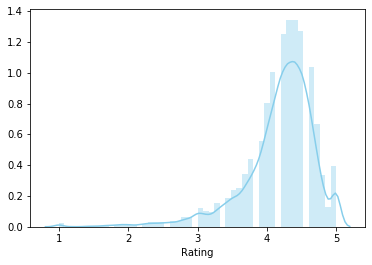

In [30]:
sns.distplot(goog_data['Rating'] , color="skyblue")
print("Skewness: %f" % goog_data['Rating'].skew());

Distribution ratings are more skewed towards higher value. From the graph it is negatively skewed. This implies that most of the users have liked the apps from google playstore

### 6. What are the top Content Rating values?
- a. Are there any values with very few records?
- b. If yes, drop those as they won’t help in the analysis

In [31]:
# Grouping 'Content Rating' category by numbers

goog_data.groupby('Content Rating').count()

,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3
Everyone,6771,6771,6771,6771,6771,6771,6771,6771,6771,6771,6771
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1


Top content ratings values are : Everyone, Everyone 10+, Mature 17+ & Teen

 Values with very few records : Adults only 18+, Unrated

In [32]:
# dropping 'Content rating' records with very few values

goog_data.drop(goog_data[goog_data['Content Rating'] == 'Adults only 18+'].index, axis=0, inplace=True)
goog_data.drop(goog_data[goog_data['Content Rating'] == 'Unrated'].index, axis=0, inplace=True)

In [33]:
print((goog_data['Content Rating'] == 'Adults only 18+').sum())
print((goog_data['Content Rating'] == 'Unrated').sum())

0
0


The 'content rating' values (Adults only 18+, Unrated) have been dropped from the records

### 7. Effect of size on rating
- a. Make a joinplot to understand the effect of size on rating
- b. Do you see any patterns?
- c. How do you explain the pattern?

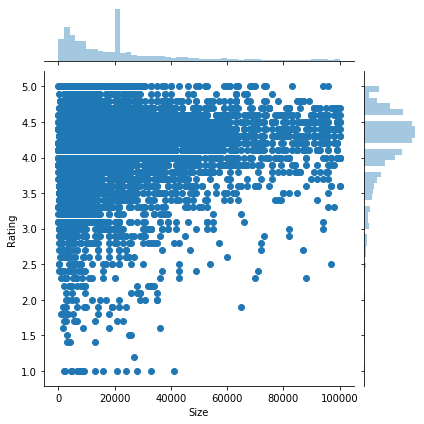

In [34]:
# Making a jointplot between size and rating

sns.jointplot(x='Size', y='Rating', data = goog_data, kind = 'scatter');

- Most of the higher ratings ratings apps are 70mb and below.
- This implies most of the apps that were liked by playstore users were 70mb and less

### 8. Effect of price on rating
- a. Make a jointplot (with regression line)
- b. What pattern do you see?
- c. How do you explain the pattern?
- d. Replot the data, this time with only records with price > 0
- e. Does the pattern change?
- f. What is your overall inference on the effect of price on the rating

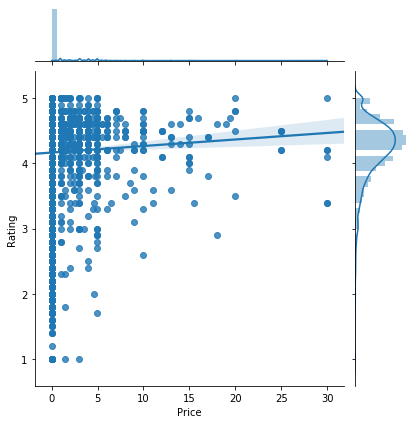

In [35]:
# Making a jointplot between price and rating

sns.jointplot(x='Price', y='Rating', data = goog_data, kind = 'reg');

- Majority of the apps that have a high rating are between 0 to 5 dollars
- This implies most of the users are dowloading apps that are free or less than or equal to $5

In [36]:
# plotting data with records of price > 0

# filtering data for 'price' > 0

data = goog_data['Price']>0
data1 = goog_data[data]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, TurboScan: scan documents and receipts in PDF to sugar, sugar
Data columns (total 12 columns):
Category          618 non-null object
Rating            618 non-null float64
Reviews           618 non-null int32
Size              618 non-null float64
Installs          618 non-null int32
Type              618 non-null object
Price             618 non-null float64
Content Rating    618 non-null object
Genres            618 non-null object
Last Updated      618 non-null object
Current Ver       618 non-null object
Android Ver       618 non-null object
dtypes: float64(3), int32(2), object(7)
memory usage: 57.9+ KB


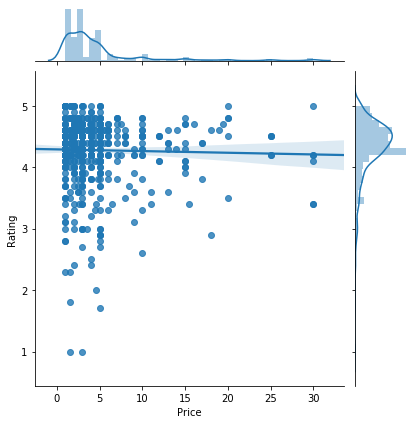

In [37]:
# jointplot between price>0 and ratings

sns.jointplot(x='Price', y='Rating', data = data1, kind = 'reg');

- The patterns dont change as still most of the apps are lying at a price range of 5 dollars or less
- Most liked apps are priced at less than $5

### 9. Look at all the numeric interactions together –
- a. Make a pairplot with the columns - 'Reviews', 'Size', 'Rating', 'Price'

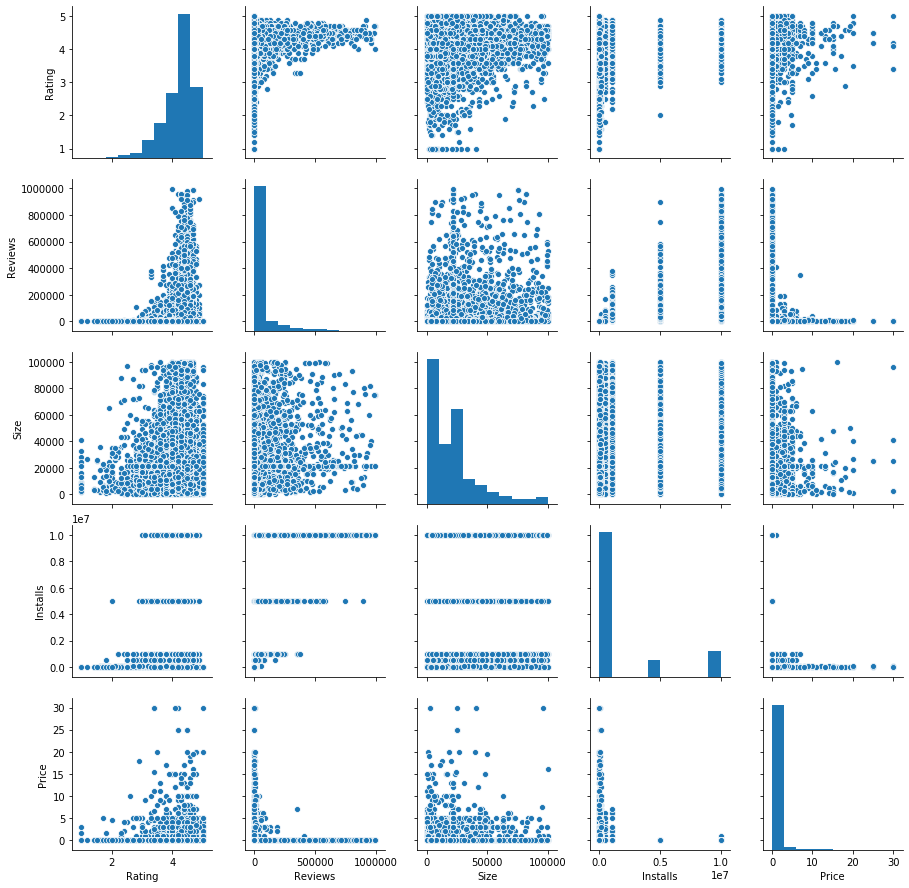

In [38]:
sns.pairplot(goog_data);

### 10. Rating vs. content rating
- a. Make a bar plot displaying the rating for each content rating
- b. Which metric would you use? Mean? Median? Some other quantile?
- c. Choose the right metric and plot

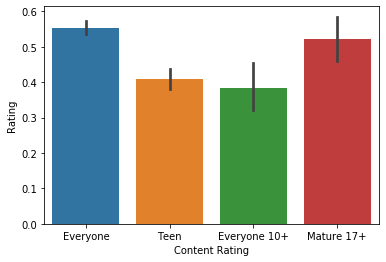

In [39]:
# bar plot between rating for each content rating
# metric chosen is standard deviation

sns.barplot(x='Content Rating',y='Rating',data=goog_data, estimator=np.std);

### 11. Content rating vs. size vs. rating – 3 variables at a time
- a. Create 5 buckets (20% records in each) based on Size
- b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
- c. Make a heatmap of this
    - i. Annotated
    - ii. Greens color map
- d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [40]:
# creating buckets based on size   

pd.qcut(goog_data['Size'],5)

App
Photo Editor & Candy Camera & Grid & ScrapBook        (12000.0, 21516.53]
Coloring book moana                                   (12000.0, 21516.53]
U Launcher Lite – FREE Live Cool Themes, Hide Apps      (4600.0, 12000.0]
Pixel Draw - Number Art Coloring Book                     (8.499, 4600.0]
Paper flowers instructions                              (4600.0, 12000.0]
                                                             ...         
FR Calculator                                             (8.499, 4600.0]
Sya9a Maroc - FR                                      (32000.0, 100000.0]
Fr. Mike Schmitz Audio Teachings                          (8.499, 4600.0]
The SCP Foundation DB fr nn5n                         (12000.0, 21516.53]
iHoroscope - 2018 Daily Horoscope & Astrology         (12000.0, 21516.53]
Name: Size, Length: 8420, dtype: category
Categories (5, interval[float64]): [(8.499, 4600.0] < (4600.0, 12000.0] < (12000.0, 21516.53] < (21516.53, 32000.0] < (32000.0, 100000.0]]